# Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import seaborn as sns
import os
from PIL import Image
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Review

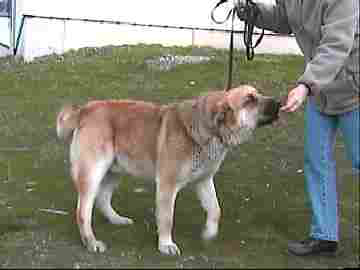

In [2]:
# Review single image
with Image.open('../Data/CATS_DOGS/train/DOG/1010.jpg') as im:
    display(im)

## Image statistics

In [25]:
# Top level path
path = '../Data/CATS_DOGS/'

# Create a list of image names
img_names = []
for folder,subfolder,filenames in os.walk(path):
    for img in filenames:
        img_names.append(f'{folder}/{img}')

In [26]:
len(img_names)

24994

In [23]:
# Test images and create a list of image sizes
img_sizes = []
rejected = []

for img in img_names:
    try:
        with Image.open(img) as im:
            img_sizes.append(im.size)
    except:
        rejected.append(img)

C:\Users\alexb\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [24]:
len(img_sizes)

24994

In [45]:
# Create dataframe for image analysis
df = pd.DataFrame(img_sizes)
df.rename(columns={0:'width', 1:'height'}, inplace=True)
df['image'] = img_names
df['type'] = df['image'].apply(lambda x: x.split('/')[-2].split('\\')[0])
df['species'] = df['image'].apply(lambda x: x.split('/')[-2].split('\\')[1])

In [46]:
df[['width','height']].describe()

,width,height
count,24994.000000,24994.000000
mean,404.493518,361.037129
std,108.941802,96.936811
min,42.000000,33.000000
25%,323.000000,302.000000
50%,448.000000,375.000000
75%,500.000000,421.000000
max,500.000000,500.000000


<AxesSubplot:ylabel='Frequency'>

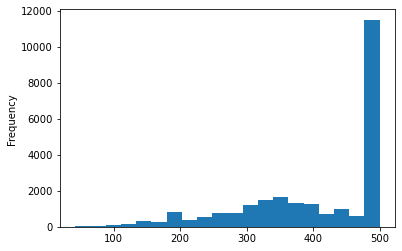

In [51]:
fig, ax = plt.subplot
df['width'].plot(kind='hist', bins=20)